In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from control.matlab import *
import slycot
from scipy import signal
from scipy.linalg import fractional_matrix_power
# Python control toolbox available at https://python-control.readthedocs.io/

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})


In [58]:
A = np.array([[-0.75,1],[-0.3,-0.75]])
B = np.array([2,1]).reshape((2,1))
C = np.array([1,2])
D = 0

sys = ss(A,B,C,D)

Wc = gram(sys,'c') # Controllability Gramian
Wo = gram(sys,'o') # Observability Gramian

sysb = balred(sys,len(B)) # Balance the system

BWc = gram(sysb,'c') # Balanced Gramians
BWo = gram(sysb,'o')

In [83]:
# Manually compute transform matrix for balanced Gramians
_,Tu = np.linalg.eig(Wc@Wo)

# Resolve sign ambiguity of eigenvectors
for j in range(Tu.shape[1]):
    if Tu[0,j] < 0:
        Tu[:,j] = -Tu[:,j]
        
Sig_c = np.linalg.inv(Tu) @ Wc @ np.linalg.inv(Tu).T
Sig_o = Tu.T @ Wo @ Tu
Sig_s = fractional_matrix_power(Sig_c,1/4) @ fractional_matrix_power(Sig_o,-1/4)

T = Tu @ Sig_s
Ti = np.linalg.inv(T)

In [84]:
## Plot Gramians
theta = np.arange(0,2*np.pi,0.01)
xc = np.cos(theta)
yc = np.sin(theta)
CIRC = np.row_stack((xc,yc))

# Off-diagonals should be within machine precision of 0, but
# in case that machine error is negative we manually threshold them:
BWc[BWc<0] = 0
BWo[BWo<0] = 0

ELLIPb = Ti @ np.sqrt(BWc) @ T @ CIRC
ELLIPc = np.sqrt(Wc) @ CIRC
ELLIPo = np.sqrt(Wo) @ CIRC

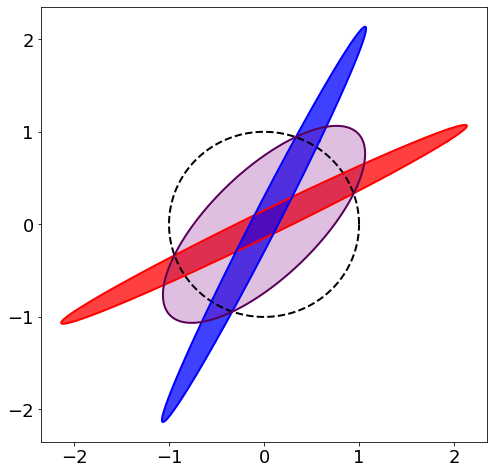

In [86]:
plt.plot(xc,yc,'k--',linewidth=2)

# Draw controllability Gramian (unbalanced)
plt.plot(ELLIPc[0,:],ELLIPc[1,:],'r',linewidth=2)
plt.fill(ELLIPc[0,:],ELLIPc[1,:],'r',alpha=0.75)

# Draw observability Gramian (unbalanced)
plt.plot(ELLIPo[0,:],ELLIPo[1,:],'b',linewidth=2)
plt.fill(ELLIPo[0,:],ELLIPo[1,:],'b',alpha=0.75)

# Draw balanced Gramians
plt.plot(ELLIPb[0,:],ELLIPb[1,:],color=(0.35,0,0.35),linewidth=2)
plt.fill(ELLIPb[0,:],ELLIPb[1,:],color=(0.5,0,0.5),alpha=0.25)

plt.show()